# Ejercicio 12
ejemplo de fourier


In [1]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import math

sig_dest_imx_arr = []
sig_dest_rex_arr = []
sig_dest_mag_arr = []
def calc_dft(sig_src_arr):
    
    global sig_dest_imx_arr
    global sig_dest_rex_arr
    global sig_dest_mag_arr

    sig_dest_imx_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_rex_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_mag_arr = [None]*int((len(sig_src_arr)/2))
    
    for j in range(int(len(sig_src_arr)/2)):
        sig_dest_rex_arr[j] =0
        sig_dest_imx_arr[j] =0

    for k in range(int(len(sig_src_arr)/2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))

    for x in range(int(len(sig_src_arr)/2)):
        sig_dest_mag_arr[x] = math.sqrt(math.pow(sig_dest_rex_arr[x],2)+math.pow(sig_dest_imx_arr[x],2))
        
    
def plot_signals(sig_src_arr):
    #style.use('ggplot')
    style.use('dark_background')
    f,plt_arr = plt.subplots(5, sharex=True)
    f.suptitle("Discrete Fourier Transform (DFT)")

    plt_arr[0].plot(sig_src_arr, color='red')
    plt_arr[0].set_title("Input Signal",color='red')
    
    plt_arr[1].plot(sig_dest_rex_arr, color='green')
    plt_arr[1].set_title("Frequency Domain(Real part)",color='green')

    plt_arr[2].plot(sig_dest_imx_arr, color='green')
    plt_arr[2].set_title("Frequency Domain(Imaginary part)",color='green')

    plt_arr[3].plot(sig_dest_mag_arr, color='magenta')
    plt_arr[3].set_title("Frequency Domain (Magnitude))",color='yellow')

    plt_arr[4].plot(sig_dest_idft_arr, color='magenta')
    plt_arr[4].set_title("Time Domain (Outout from Inverse DFT))",color='yellow')

    plt.rcParams["figure.figsize"] = [15,6]
    
    plt.show()



sig_dest_idft_arr =[]  

def calc_idft(sig_src_rex_arr, sig_src_imx_arr):
     global sig_dest_idft_arr
     sig_dest_idft_arr = [None]*(len(sig_src_rex_arr)*2)

     for j in range(len(sig_src_rex_arr)*2):
         sig_dest_idft_arr[j] =0


     for x in range(len(sig_src_rex_arr)):
        sig_src_rex_arr[x] =  sig_src_rex_arr[x]/len(sig_src_rex_arr)
        sig_src_imx_arr[x] =  sig_src_imx_arr[x]/len(sig_src_rex_arr)


     for k in range(len(sig_src_rex_arr)):
        for i in range(len(sig_src_rex_arr)*2):
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_rex_arr[k] *math.cos(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_imx_arr[k] *math.sin(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            




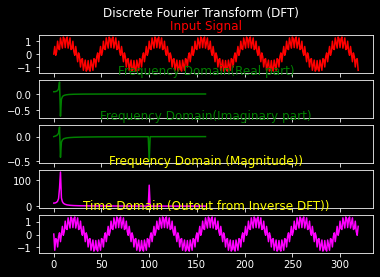

In [2]:
calc_dft(sigs.InputSignal_1kHz_15kHz)
calc_idft(sig_dest_rex_arr,sig_dest_imx_arr)
plot_signals(sigs.InputSignal_1kHz_15kHz)

ECG signal

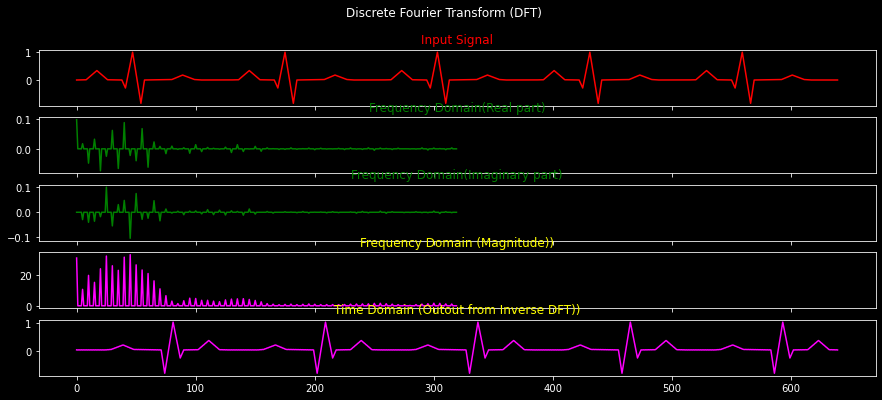

In [3]:
calc_dft(sigs.ecg_signal)
calc_idft(sig_dest_rex_arr,sig_dest_imx_arr)
plot_signals(sigs.ecg_signal)